### 선형 판별분석과 이차 판별분석

In [4]:
# 필요한 패키지 설치

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kukuroo3/body-performance-data
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/bodyPerformance.csv")

# 데이터 샘플 확인
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


C:\Users\qorud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qorud\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\qorud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qorud\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in fav

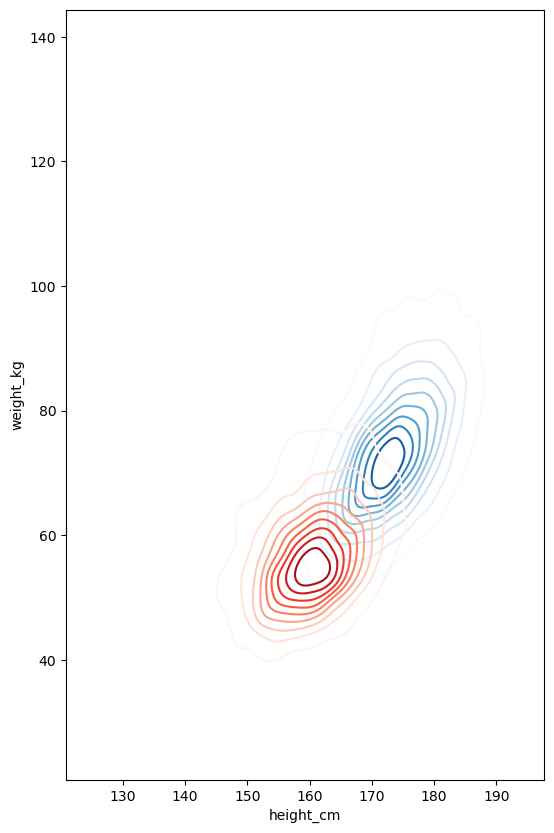

In [6]:
# 성별 분포 시각화 (키X몸무게)

# 성별 구분 데이터셋 생성
df_man = df.loc[df['gender'] == 'M']
df_woman = df.loc[df['gender'] == 'F']

# 그래프 설정
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# 가로길이, 세로길이 변수 축 설정
ax = sns.kdeplot(df_man.height_cm, df_man.weight_kg, cmap="Blues", 
                 shade=False, shade_lowest=False, cbar=False)
ax = sns.kdeplot(df_woman.height_cm, df_woman.weight_kg, cmap="Reds", 
                 shade=False, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

#### 주요독립변수로 판단되는 키와 몸무게 칼럼의 수치에 따라 남성과 여성의 분포가 어떻게 나타나는지 확인한다. 남성은 키가 약 175cm 몸무게가 70kg 부근에 주로 분포해 있고 여성은 키 162cm 몸무게 55kg 부근에 주로 분포해 있다. 그리고 일부 공간은 성별이 겹쳐 있는 것을 알 수 있다.

In [7]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
df_x = df.drop(['gender','age','class'],axis=1)
df_y = df[['gender']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


#### 선형 판별분석과 이차 판별분석 모델을 적용하기에 앞서 독립변수를 정규화 스케일링 해준다. 독립변수에는 중요하지 않을 것으로 판단되는 연령과 클래스 칼럼도 제거해 주었다. 실제로 모델을 만들때는 해당 변수가 정말로 영향이 없는지 확인한 후에 제거해 줘야한다.

In [8]:
# 학습셋과 테스트셋 분리하여 생성(7:3)
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.3,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  9375
test data 개수:  4018


#### 스케일링을 한 후에는 7:3 비율로 학습셋과 테스트셋으로 분리한다

In [9]:
# 선형 판별분석 모델 적용

LDA_1=LinearDiscriminantAnalysis(store_covariance=True)

LDA_1.fit(x_train, y_train) # LDA 적합
y_train_pred=LDA_1.predict(x_train)
y_test_pred=LDA_1.predict(x_test)

print(accuracy_score(y_train, y_train_pred)) # 학습셋 accuracy
print(accuracy_score(y_test, y_test_pred)) # 테스트셋 accuracy

0.9784533333333333
0.9810851169736187


C:\Users\qorud\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 데이터 전처리가 끝난 상태에서 함수를 통해 선형판별분석 모델을 생성하여 데이터 셋에 적용해 준다. 아웃풋 결과로 학습셋은 97.8% 테스트셋은 98.1%의 정확도를 나타냈다. 신체 정보는 성별분류에 명확한 정보이기 때문에 예측력이 매우 높게 나왔다.

In [10]:
# 선형 판별분석 모델 상수와 계수 값 출력

print('Intercept: ', LDA_1.intercept_)
print('Coefficient: ', LDA_1.coef_)

Intercept:  [-14.29894437]
Coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


#### 앞의 이론 부분에서 다뤘던 선형 판별분석 모델의 상수와 계숫값을 산출했다. 모델에 투입됐던 9개의 독립변수의 수치와 이 값들을 계산해 주면 각 관측치의 예측 범주를 계산할 수 있다.
#### 선형회귀 모델의 회귀계수와 동일한 원리다.

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\qorud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lda_component'>

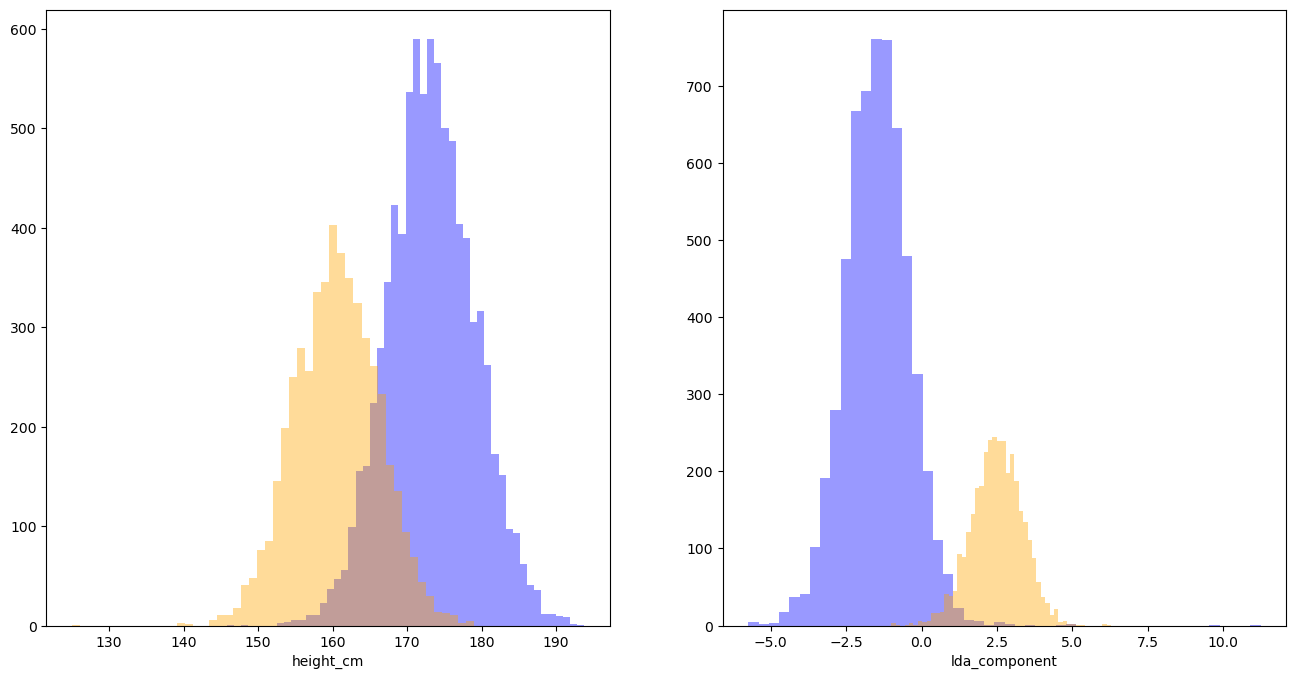

In [11]:
# 선형 판별분석 차원축소 적용

# 주성분 한개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com,columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'], 
             hist=True, kde=False, color="blue", 
             label = 'man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'], 
             hist=True, kde=False, color="orange", 
             label = 'woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'], 
             hist=True, kde=False, color="blue", label = 'man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'], 
             hist=True, kde=False, color="orange", label = 'woman', ax=axs[1])

#### 이번에는 선형판별분석 모델을 통해 차원축소를 한다. n_components=1 옵션으로 9개의 독립변수를 단 하나의 차원으로 축소했다. 그리고 산출한 주성분이 실제 성별 구분을 잘하는지 확인하기 위해 기존의 키 변수와 주성분을 시각화하여 비교했다. 왼쪽의 키 변수는 남성과 여성이 중복되는 공간이 눈으로 봐도 크지만, 주성분은 매우 적은 부분만 중복되는 것을 확인할 수있다.

In [12]:
# 이차 판별분석 모델 적용

qda=QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train) # QDA 적합
qda_y_train_pred=qda.predict(x_train)
qda_y_test_pred=qda.predict(x_test)


print(accuracy_score(y_train, qda_y_train_pred)) # 학습셋 accuracy
print(accuracy_score(y_test, qda_y_test_pred)) # 예측셋 accuracy

# 다음으로 함수를 통해 이차판별분석 모델을 생성하여 데이터셋에 적용해 준다.
#아웃풋 결과로 학습셋은 98%,테스트셋은 97.9%의 정확도를 나타냈다.
#이번 실습 데이터셋에서는 선형 판별분석과 이차 판별분석의 분류 예측력이 유사하게 나왔다.
#하지만 범주의 공분산이 많이 다른 데이터 경우 이차 판별분석이 더 높은 성능을 보이는 경우가 많다.

0.98048
0.9798407167745147


C:\Users\qorud\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# 이차 판별분석 모델 성능 리포트 출력

print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018

